In [1]:
!pip3 install torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 500
x,y = datasets.make_circles(n_samples=n_pts,random_state = 123,noise=0.1,factor=0.2)
x_data = torch.tensor(x)
y_data = torch.tensor(y).reshape(500,1)

In [3]:
def scatterplot():
  plt.scatter(x[y==0,0],x[y==0,1])
  plt.scatter(x[y==1,0],x[y==1,1])


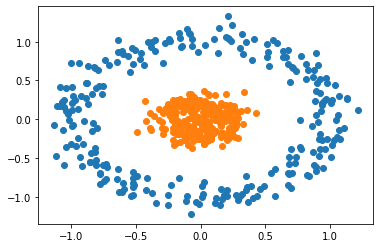

In [4]:
 scatterplot()

In [5]:
class Model(nn.Module):
  def __init__(self,in_parameters,h1,out_parameters):
    super().__init__()
    self.linear1 = nn.Linear(in_parameters,h1)
    self.linear2 = nn.Linear(h1,out_parameters)
  def forward(self,x):
    pred = torch.sigmoid(self.linear1(x))
    pred = torch.sigmoid(self.linear2(pred))
    return pred
  def predict(self,x):
    pred = self.forward(x)
    if pred > 0.5:
      return 1
    else:
      return 0    

In [6]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [7]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.1)

In [8]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred,y_data.float())
  losses.append(loss)
  print('epoch is {} and loss is {}'.format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch is 0 and loss is 0.7148522138595581
epoch is 1 and loss is 0.6947318911552429
epoch is 2 and loss is 0.6955163478851318
epoch is 3 and loss is 0.7014891505241394
epoch is 4 and loss is 0.7013983130455017
epoch is 5 and loss is 0.6974702477455139
epoch is 6 and loss is 0.693925678730011
epoch is 7 and loss is 0.6928598284721375
epoch is 8 and loss is 0.6939383149147034
epoch is 9 and loss is 0.6954388618469238
epoch is 10 and loss is 0.6958754062652588
epoch is 11 and loss is 0.6949177980422974
epoch is 12 and loss is 0.6931490302085876
epoch is 13 and loss is 0.6913898587226868
epoch is 14 and loss is 0.6901612877845764
epoch is 15 and loss is 0.6894590854644775
epoch is 16 and loss is 0.6888433694839478
epoch is 17 and loss is 0.6877668499946594
epoch is 18 and loss is 0.6859008073806763
epoch is 19 and loss is 0.6832481622695923
epoch is 20 and loss is 0.6800421476364136
epoch is 21 and loss is 0.6765590310096741
epoch is 22 and loss is 0.6729680895805359
epoch is 23 and loss i

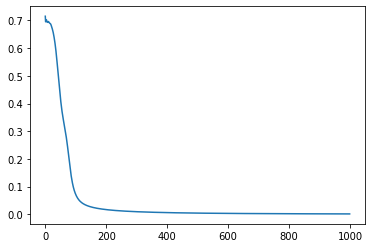

In [9]:
plt.plot(range(epochs),losses)

In [10]:
def plot_decision_boundary(x,y):
  x_span = np.linspace(min(x[:,0]-0.25),max(x[:,0]+0.25))
  y_span = np.linspace(min(x[:,1]-0.25),max(x[:,1]+0.25))
  xx,yy = np.meshgrid(x_span,y_span)
  
  grid = torch.tensor(np.c_[xx.ravel(),yy.ravel()])
  pred_func = model.forward(grid.float())
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx,yy,z)
  

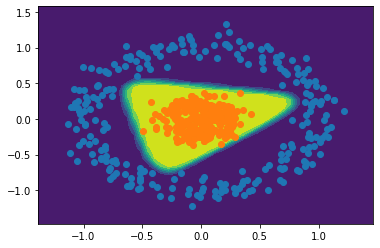

In [11]:
plot_decision_boundary(x,y)
scatterplot()

prediction is  1


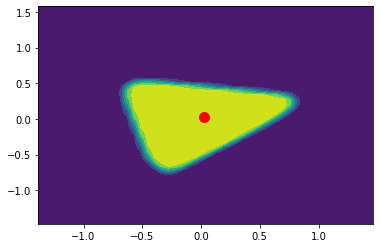

In [14]:
x_axis = 0.025
y_axis = 0.025
point = torch.tensor([x_axis,y_axis])
prediction = model.predict(point)
plt.plot([x_axis],[y_axis],marker = 'o', markersize= 10, color = 'red')
print('prediction is ',prediction)
plot_decision_boundary(x,y)